## Algorithm: K Nearest Neighbors (K-NN) 

- Desc
    * Find the K-nearest nieghbors to each test-time point $x_{test}$ and majority vote to assign label to $x_{test}$
    * K: num neighbors that are used to determine predicted class label
        * typically an odd number (so no ties)
- Extensions
    * Weighted votes e.g., each neighbor gets vote proportional to inv of distance
- Notes
    * Doesn't really have a "training" phase. Training phase is just save all the data points
    * Testing phase is expensive in space & time
      - Space = O(N * d) if N training points
      - Time = M * O(N * d) if N training points and M test points

In [3]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [27]:
import heapq

In [29]:
from collections import Counter

In [7]:
def get_random_samples(n_samples, offset, feat_dim=2):
    samples = np.random.rand(n_samples, feat_dim)
    samples = samples + offset
    return samples
    

In [42]:
class KNN(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __call__(self, x_test, k=10):
        labels = []
        for x in x_test:
            # get the k-nearest neighbors
            dist = np.linalg.norm(self.x - x, axis=1)
            # determine the k smallest value
            x_idx = self._get_k_nearest(dist, k)
            # could do this with a mean heap
            pred = Counter(self.y[x_idx]).most_common()[0][0]
            # get the majority vote label 
            labels.append(pred)
        return labels

    def _get_k_nearest(self, dist, k):
        # distance, idx
        heap = []
        heapq.heapify(heap) #zip(dist.tolist(), list(range(self.x.shape[0]))))
        for i, d in enumerate(dist):
            # we add -d so max heap 
            heapq.heappush(heap, (-d, i))
            while len(heap) > k:
                heapq.heappop(heap)

        # pop off the max elems to keep heap size at k 
        _, idx = zip(*heap) 
        return np.array(idx)

        

In [44]:
knn = KNN(x_train, y_train)
knn(x_test * -1)

[np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1),
 np.int64(-1)]

In [24]:
x_train_positive = get_random_samples(100, 10)
y_train_positive = np.array([1] * len(x_train_positive))

x_train_negative = get_random_samples(100, -10)
y_train_negative = np.array([-1] * len(x_train_negative))

In [26]:
x_train = np.concat([x_train_positive, x_train_negative], axis=0)
y_train = np.concat([y_train_positive, y_train_negative], axis=0)

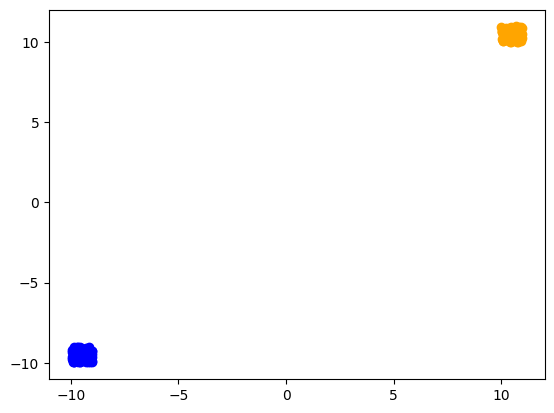

In [19]:
plt.scatter(x_train_positive[:, 0], x_train_positive[:, 1], color="orange")
plt.scatter(x_train_negative[:, 0], x_train_negative[:, 1], color="blue")

In [21]:
x_test = get_random_samples(10, 0) * 10